In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import subprocess


def get_git_root():
    """Get the root directory of the git repository"""
    try:
        git_root = (
            subprocess.check_output(
                ["git", "rev-parse", "--show-toplevel"], stderr=subprocess.DEVNULL
            )
            .strip()
            .decode("utf-8")
        )
        return git_root
    except (subprocess.CalledProcessError, FileNotFoundError):
        return None


# Change to git root
git_root = get_git_root()
if git_root:
    os.chdir(git_root)
    print(f"Changed to git root: {os.getcwd()}")
else:
    print("Not in a git repository or git not found")

Changed to git root: /Users/sherman/GitHub/CSE-6748


In [3]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error

pd.set_option("display.max_columns", None)

In [4]:
student_profile = pd.read_pickle("data/cleaned/student_profile_dataset.pkl")
student_profile.head()

,mask_studentpersonkey,GradeLevel,CurrentEnrollment,FinalPrimaryEnrollmentForYearFlag,RetainedFlag,EnrollmentReasonDesc,WithDrawalReasonDesc,FirstDayOfSchoolYear,SchoolYearNumberFall,SchoolYearNumberSpring,SchoolStatusDesc,SchoolDetailReportName,SchoolDetailLevelDesc,SchoolStatusDescNextYear,SchoolDetailReportNameNextYear,SchoolDetailLevelDescNextYear,ActiveGiftedStudentResultRecordFlag,grad,milestone,illuminate,sat,rit
2,107055,6,N,Y,N,Transferred from another GA district,Year End,2023-07-19,2023,2024,Open,Woodland Middle,Middle School,Open,Woodland Middle,Middle School,NaN,NaN,NestedData(SubjectDesc=['English Language Arts...,NestedData(responsedatevalue=[datetime.date(20...,NaN,NaN
3,114271,12,N,Y,Y,Continuing in same school,High School Graduation,2021-07-24,2021,2022,Open,Johns Creek High,High School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,117427,12,N,Y,N,Continuing in same school,High School Graduation,2021-07-24,2021,2022,Open,Northview High,High School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,117773,12,N,Y,N,Continuing in same school,Court Order or Legal Requirement,2021-07-24,2021,2022,Open,Centennial High,High School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,117995,12,N,Y,N,Continuing in same school,High School Graduation,2021-07-24,2021,2022,Open,Roswell High,High School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
X_index = pd.read_parquet("data/cleaned/X_index.parquet")
X_train = pd.read_parquet("data/cleaned/X_train.parquet")
X_valid = pd.read_parquet("data/cleaned/X_valid.parquet")
Y_train = pd.read_parquet("data/cleaned/Y_train.parquet")
Y_valid = pd.read_parquet("data/cleaned/Y_valid.parquet")

X_train = pd.merge(X_index, X_train, left_index=True, right_index=True, how="inner")
X_valid = pd.merge(X_index, X_valid, left_index=True, right_index=True, how="inner")

In [6]:
display(X_index.head())
display(X_index.shape)
display(X_train.head())
display(X_train.shape)
display(X_valid.head())
display(X_valid.shape)
display(Y_train.head())
display(Y_train.shape)
display(Y_valid.head())
display(Y_valid.shape)

,mask_studentpersonkey
0,1389182
1,1390795
2,1392398
3,1395568
4,1395578


(13557, 1)

,mask_studentpersonkey,RetainedFlag_latest,GradeLevel_latest,is_gifted_latest,grade_mode_numeric_latest,improvement_first_to_last_latest,is_on_sat_grade_level_latest,last_percent_correct_latest,low_mastery_rate_below_50_latest,mastery_rate_above_80_latest,math_improvement_first_to_last_latest,math_low_mastery_rate_below_50_latest,math_mastery_rate_above_80_latest,math_mean_item_pct_correct_latest,math_percent_extension_latest,math_percent_reteach_latest,math_percent_review_practice_latest,math_slope_percent_correct_over_time_latest,math_std_item_pct_correct_latest,math_total_points_earned_latest,math_total_points_possible_latest,math_weighted_percent_correct_latest,mean_item_percent_correct_latest,mean_standard_percent_correct_latest,mean_std_pct_ela_latest,mean_std_pct_math_latest,num_assessments_latest,num_items_latest,percent_extension_latest,percent_reteach_latest,percent_review_practice_latest,slope_percent_correct_over_time_latest,std_item_percent_correct_latest,total_points_earned_latest,total_points_possible_latest,verbal_improvement_first_to_last_latest,verbal_low_mastery_rate_below_50_latest,verbal_mastery_rate_above_80_latest,verbal_mean_item_pct_correct_latest,verbal_percent_extension_latest,verbal_percent_reteach_latest,verbal_percent_review_practice_latest,verbal_slope_percent_correct_over_time_latest,verbal_std_item_pct_correct_latest,verbal_total_points_earned_latest,verbal_total_points_possible_latest,verbal_weighted_percent_correct_latest,weighted_overall_percent_correct_latest,achievement_level_mean_ela_latest,achievement_level_mean_math_latest,lexile_mean_ela_latest,lexile_mean_math_latest,mean_achievement_level_all_latest,mean_lexile_score_all_latest,mean_scale_score_all_latest,num_subjects_tested_latest,num_test_days_latest,num_unique_test_dates_latest,pct_proficient_all_latest,pct_proficient_ela_latest,pct_proficient_math_latest,scale_score_improvement_all_latest,scale_score_improvement_ela_latest,scale_score_improvement_math_latest,scale_score_mean_ela_latest,scale_score_mean_math_latest,scale_score_slope_all_latest,scale_score_slope_ela_latest,scale_score_slope_math_latest,scale_score_std_ela_latest,scale_score_std_math_latest,std_scale_score_all_latest,count_quintile_avg_latest,count_quintile_hiavg_latest,count_quintile_high_latest,count_quintile_low_latest,count_quintile_lowavg_latest,max_rit_score_latest,mean_percent_correct_latest,mean_percentile_latest,mean_rit_score_latest,mean_test_duration_latest,min_rit_score_latest,num_tests_latest,pct_quintile_high_latest,std_percent_correct_latest,std_percentile_latest,std_rit_score_latest,std_test_duration_latest,grade_mode_numeric_delta,improvement_first_to_last_delta,is_on_sat_grade_level_delta,last_percent_correct_delta,low_mastery_rate_below_50_delta,mastery_rate_above_80_delta,math_improvement_first_to_last_delta,math_low_mastery_rate_below_50_delta,math_mastery_rate_above_80_delta,math_mean_item_pct_correct_delta,math_percent_extension_delta,math_percent_reteach_delta,math_percent_review_practice_delta,math_slope_percent_correct_over_time_delta,math_std_item_pct_correct_delta,math_total_points_earned_delta,math_total_points_possible_delta,math_weighted_percent_correct_delta,mean_item_percent_correct_delta,mean_standard_percent_correct_delta,mean_std_pct_ela_delta,mean_std_pct_math_delta,num_assessments_delta,num_items_delta,percent_extension_delta,percent_reteach_delta,percent_review_practice_delta,slope_percent_correct_over_time_delta,std_item_percent_correct_delta,total_points_earned_delta,total_points_possible_delta,verbal_improvement_first_to_last_delta,verbal_low_mastery_rate_below_50_delta,verbal_mastery_rate_above_80_delta,verbal_mean_item_pct_correct_delta,verbal_percent_extension_delta,verbal_percent_reteach_delta,verbal_percent_review_practice_delta,verbal_slope_percent_correct_over_time_delta,verbal_std_item_pct_correct_delta,verbal_total_points_earned_delta,verbal_total_points_possible_delta,verbal_weighted_percent_correct_delta,weighted_

(10845, 260)

,mask_studentpersonkey,RetainedFlag_latest,GradeLevel_latest,is_gifted_latest,grade_mode_numeric_latest,improvement_first_to_last_latest,is_on_sat_grade_level_latest,last_percent_correct_latest,low_mastery_rate_below_50_latest,mastery_rate_above_80_latest,math_improvement_first_to_last_latest,math_low_mastery_rate_below_50_latest,math_mastery_rate_above_80_latest,math_mean_item_pct_correct_latest,math_percent_extension_latest,math_percent_reteach_latest,math_percent_review_practice_latest,math_slope_percent_correct_over_time_latest,math_std_item_pct_correct_latest,math_total_points_earned_latest,math_total_points_possible_latest,math_weighted_percent_correct_latest,mean_item_percent_correct_latest,mean_standard_percent_correct_latest,mean_std_pct_ela_latest,mean_std_pct_math_latest,num_assessments_latest,num_items_latest,percent_extension_latest,percent_reteach_latest,percent_review_practice_latest,slope_percent_correct_over_time_latest,std_item_percent_correct_latest,total_points_earned_latest,total_points_possible_latest,verbal_improvement_first_to_last_latest,verbal_low_mastery_rate_below_50_latest,verbal_mastery_rate_above_80_latest,verbal_mean_item_pct_correct_latest,verbal_percent_extension_latest,verbal_percent_reteach_latest,verbal_percent_review_practice_latest,verbal_slope_percent_correct_over_time_latest,verbal_std_item_pct_correct_latest,verbal_total_points_earned_latest,verbal_total_points_possible_latest,verbal_weighted_percent_correct_latest,weighted_overall_percent_correct_latest,achievement_level_mean_ela_latest,achievement_level_mean_math_latest,lexile_mean_ela_latest,lexile_mean_math_latest,mean_achievement_level_all_latest,mean_lexile_score_all_latest,mean_scale_score_all_latest,num_subjects_tested_latest,num_test_days_latest,num_unique_test_dates_latest,pct_proficient_all_latest,pct_proficient_ela_latest,pct_proficient_math_latest,scale_score_improvement_all_latest,scale_score_improvement_ela_latest,scale_score_improvement_math_latest,scale_score_mean_ela_latest,scale_score_mean_math_latest,scale_score_slope_all_latest,scale_score_slope_ela_latest,scale_score_slope_math_latest,scale_score_std_ela_latest,scale_score_std_math_latest,std_scale_score_all_latest,count_quintile_avg_latest,count_quintile_hiavg_latest,count_quintile_high_latest,count_quintile_low_latest,count_quintile_lowavg_latest,max_rit_score_latest,mean_percent_correct_latest,mean_percentile_latest,mean_rit_score_latest,mean_test_duration_latest,min_rit_score_latest,num_tests_latest,pct_quintile_high_latest,std_percent_correct_latest,std_percentile_latest,std_rit_score_latest,std_test_duration_latest,grade_mode_numeric_delta,improvement_first_to_last_delta,is_on_sat_grade_level_delta,last_percent_correct_delta,low_mastery_rate_below_50_delta,mastery_rate_above_80_delta,math_improvement_first_to_last_delta,math_low_mastery_rate_below_50_delta,math_mastery_rate_above_80_delta,math_mean_item_pct_correct_delta,math_percent_extension_delta,math_percent_reteach_delta,math_percent_review_practice_delta,math_slope_percent_correct_over_time_delta,math_std_item_pct_correct_delta,math_total_points_earned_delta,math_total_points_possible_delta,math_weighted_percent_correct_delta,mean_item_percent_correct_delta,mean_standard_percent_correct_delta,mean_std_pct_ela_delta,mean_std_pct_math_delta,num_assessments_delta,num_items_delta,percent_extension_delta,percent_reteach_delta,percent_review_practice_delta,slope_percent_correct_over_time_delta,std_item_percent_correct_delta,total_points_earned_delta,total_points_possible_delta,verbal_improvement_first_to_last_delta,verbal_low_mastery_rate_below_50_delta,verbal_mastery_rate_above_80_delta,verbal_mean_item_pct_correct_delta,verbal_percent_extension_delta,verbal_percent_reteach_delta,verbal_percent_review_practice_delta,verbal_slope_percent_correct_over_time_delta,verbal_std_item_pct_correct_delta,verbal_total_points_earned_delta,verbal_total_points_possible_delta,verbal_weighted_percent_correct_delta,weighted_

(2712, 260)

,sat_math_score,sat_verbal_score
10338,670.0,730.0
113,470.0,500.0
6059,380.0,380.0
7088,360.0,370.0
2834,530.0,540.0


(10845, 2)

,sat_math_score,sat_verbal_score
12655,430.0,520.0
6702,580.0,610.0
13540,770.0,740.0
3042,400.0,470.0
4532,430.0,430.0


(2712, 2)

In [7]:
# Load the model
with open("models/catboost_model.pkl", "rb") as f:
    model = pickle.load(f)

print("Model loaded successfully")

Model loaded successfully


In [8]:
# Generate predictions for validation set
y_pred_valid = model.predict(X_valid.drop("mask_studentpersonkey", axis=1))
y_pred_valid_int = np.round(y_pred_valid, 0).astype(int)

# Create predictions DataFrame
predictions_df = pd.DataFrame(
    {
        "mask_studentpersonkey": X_valid["mask_studentpersonkey"],
        "actual_sat_math_score": Y_valid["sat_math_score"],
        "actual_sat_verbal_score": Y_valid["sat_verbal_score"],
        "pred_sat_math_score": y_pred_valid_int[:, 0],
        "pred_sat_verbal_score": y_pred_valid_int[:, 1],
    }
)

# fmt: off
# Calculate errors
predictions_df["error_math"] = (predictions_df["actual_sat_math_score"] - predictions_df["pred_sat_math_score"])
predictions_df["error_verbal"] = (predictions_df["actual_sat_verbal_score"] - predictions_df["pred_sat_verbal_score"])
predictions_df["abs_error_math"] = np.abs(predictions_df["error_math"])
predictions_df["abs_error_verbal"] = np.abs(predictions_df["error_verbal"])

print(f"Generated predictions for {len(predictions_df)} students")
print(f"Overall RMSE - Math: {np.sqrt(mean_squared_error(predictions_df['actual_sat_math_score'], predictions_df['pred_sat_math_score'])):.2f}")
print(f"Overall RMSE - Verbal: {np.sqrt(mean_squared_error(predictions_df['actual_sat_verbal_score'], predictions_df['pred_sat_verbal_score'])):.2f}")
# fmt: on

predictions_df.head()

Generated predictions for 2712 students
Overall RMSE - Math: 62.19
Overall RMSE - Verbal: 54.67


,mask_studentpersonkey,actual_sat_math_score,actual_sat_verbal_score,pred_sat_math_score,pred_sat_verbal_score,error_math,error_verbal,abs_error_math,abs_error_verbal
1,1390795,560.0,550.0,574,596,-14.0,-46.0,14.0,46.0
3,1395568,560.0,560.0,551,578,9.0,-18.0,9.0,18.0
10,1410424,610.0,560.0,595,619,15.0,-59.0,15.0,59.0
12,1412177,460.0,390.0,364,373,96.0,17.0,96.0,17.0
16,1419406,640.0,530.0,670,603,-30.0,-73.0,30.0,73.0


In [9]:
# Create segments based on available data types
# First, identify students in validation set from student_profile

# Get the validation student IDs
valid_student_ids = set(X_valid["mask_studentpersonkey"].astype(str))

# fmt: off
# Filter student_profile to only validation students
valid_student_profile = student_profile[student_profile["mask_studentpersonkey"].astype(str).isin(valid_student_ids)].copy()
print(f"Found {len(valid_student_profile)} records for {len(valid_student_ids)} validation students")
# fmt: on

Found 7918 records for 2712 validation students


In [10]:
# Check data availability for each assessment type
def has_data(series):
    """Check if a student has non-null data for an assessment type"""
    return series.notna() & (series != "") & (series.astype(str) != "nan")


# Create flags for each assessment type
valid_student_profile["has_rit"] = has_data(valid_student_profile["rit"])
valid_student_profile["has_illuminate"] = has_data(valid_student_profile["illuminate"])
valid_student_profile["has_milestone"] = has_data(valid_student_profile["milestone"])

# Group by student and aggregate data availability
student_data_availability = (
    valid_student_profile.groupby("mask_studentpersonkey")
    .agg({"has_rit": "any", "has_illuminate": "any", "has_milestone": "any"})
    .reset_index()
)

# fmt: off
print("Data availability summary:")
print(f"Students with RIT data: {student_data_availability['has_rit'].sum()} ({student_data_availability['has_rit'].mean()*100:.1f}%)")
print(f"Students with Illuminate data: {student_data_availability['has_illuminate'].sum()} ({student_data_availability['has_illuminate'].mean()*100:.1f}%)")
print(f"Students with Milestone data: {student_data_availability['has_milestone'].sum()} ({student_data_availability['has_milestone'].mean()*100:.1f}%)")
# fmt: on

student_data_availability.head()

Data availability summary:
Students with RIT data: 2588 (95.4%)
Students with Illuminate data: 2084 (76.8%)
Students with Milestone data: 2608 (96.2%)


,mask_studentpersonkey,has_rit,has_illuminate,has_milestone
0,1390795,True,True,True
1,1395568,True,False,False
2,1410424,True,True,True
3,1412177,True,True,True
4,1419406,True,True,True


In [11]:
# Merge predictions with student data availability
analysis_df = predictions_df.merge(
    student_data_availability,
    on="mask_studentpersonkey",
    how="left",
)

print(f"Merged data shape: {analysis_df.shape}")

analysis_df.head()

Merged data shape: (2712, 12)


,mask_studentpersonkey,actual_sat_math_score,actual_sat_verbal_score,pred_sat_math_score,pred_sat_verbal_score,error_math,error_verbal,abs_error_math,abs_error_verbal,has_rit,has_illuminate,has_milestone
0,1390795,560.0,550.0,574,596,-14.0,-46.0,14.0,46.0,True,True,True
1,1395568,560.0,560.0,551,578,9.0,-18.0,9.0,18.0,True,False,False
2,1410424,610.0,560.0,595,619,15.0,-59.0,15.0,59.0,True,True,True
3,1412177,460.0,390.0,364,373,96.0,17.0,96.0,17.0,True,True,True
4,1419406,640.0,530.0,670,603,-30.0,-73.0,30.0,73.0,True,True,True


In [12]:
# Create uncertainty analysis with individual data availability columns
def create_individual_segment_analysis():
    """Create analysis with separate has_rit, has_illuminate, has_milestone columns"""

    # Get all unique combinations of data availability
    unique_combinations = analysis_df[
        ["has_rit", "has_illuminate", "has_milestone"]
    ].drop_duplicates()

    analysis_results = []

    for _, combination in unique_combinations.iterrows():
        has_rit = combination["has_rit"]
        has_illuminate = combination["has_illuminate"]
        has_milestone = combination["has_milestone"]

        # Filter data for this specific combination
        mask = (
            (analysis_df["has_rit"] == has_rit)
            & (analysis_df["has_illuminate"] == has_illuminate)
            & (analysis_df["has_milestone"] == has_milestone)
        )

        segment_data = analysis_df[mask]

        if len(segment_data) == 0:
            continue

        # Calculate error metrics
        math_errors = segment_data["error_math"]
        verbal_errors = segment_data["error_verbal"]
        math_abs_errors = segment_data["abs_error_math"]
        verbal_abs_errors = segment_data["abs_error_verbal"]

        result = {
            # Data availability flags
            "has_rit": has_rit,
            "has_illuminate": has_illuminate,
            "has_milestone": has_milestone,
            # Sample size
            "n_students": len(segment_data),
            # Math score error metrics
            "math_mean_error": math_errors.mean(),
            "math_std_error": math_errors.std(),
            "math_mae": math_abs_errors.mean(),
            "math_rmse": np.sqrt((math_errors**2).mean()),
            "math_median_abs_error": math_abs_errors.median(),
            "math_q75_abs_error": math_abs_errors.quantile(0.75),
            "math_q95_abs_error": math_abs_errors.quantile(0.95),
            # Verbal score error metrics
            "verbal_mean_error": verbal_errors.mean(),
            "verbal_std_error": verbal_errors.std(),
            "verbal_mae": verbal_abs_errors.mean(),
            "verbal_rmse": np.sqrt((verbal_errors**2).mean()),
            "verbal_median_abs_error": verbal_abs_errors.median(),
            "verbal_q75_abs_error": verbal_abs_errors.quantile(0.75),
            "verbal_q95_abs_error": verbal_abs_errors.quantile(0.95),
            # Combined metrics
            "combined_mae": (math_abs_errors + verbal_abs_errors).mean() / 2,
            "combined_rmse": np.sqrt(
                ((math_errors**2) + (verbal_errors**2)).mean() / 2
            ),
        }

        analysis_results.append(result)

    return pd.DataFrame(analysis_results)


# Create the uncertainty analysis DataFrame
uncertainty_analysis_df = create_individual_segment_analysis()

# Add uncertainty level categorization
uncertainty_analysis_df["uncertainty_level"] = pd.qcut(
    uncertainty_analysis_df["combined_rmse"],
    q=[0, 0.6, 0.8, 1],
    labels=["Low", "Medium", "High"],
)

# Sort by uncertainty (highest first)
uncertainty_analysis_df = uncertainty_analysis_df.sort_values(
    "combined_rmse",
    ascending=False,
).reset_index(drop=True)

# Round numerical columns for better display
numerical_cols = [
    "math_mean_error",
    "math_std_error",
    "math_mae",
    "math_rmse",
    "math_median_abs_error",
    "math_q75_abs_error",
    "math_q95_abs_error",
    "verbal_mean_error",
    "verbal_std_error",
    "verbal_mae",
    "verbal_rmse",
    "verbal_median_abs_error",
    "verbal_q75_abs_error",
    "verbal_q95_abs_error",
    "combined_mae",
    "combined_rmse",
]

for col in numerical_cols:
    uncertainty_analysis_df[col] = uncertainty_analysis_df[col].round(2)


# Create segment labels for better visualization
def create_segment_label(row):
    assessments = []
    if row["has_rit"]:
        assessments.append("RIT")
    if row["has_illuminate"]:
        assessments.append("ILL")
    if row["has_milestone"]:
        assessments.append("MS")
    return "+".join(assessments) if assessments else "None"


# fmt:off
uncertainty_analysis_df["segment_label"] = uncertainty_analysis_df.apply(create_segment_label, axis=1)
# fmt:on

# Display the existing uncertainty analysis
print("EXISTING UNCERTAINTY ANALYSIS RESULTS")
print("=" * 50)
uncertainty_analysis_df

EXISTING UNCERTAINTY ANALYSIS RESULTS


,has_rit,has_illuminate,has_milestone,n_students,math_mean_error,math_std_error,math_mae,math_rmse,math_median_abs_error,math_q75_abs_error,math_q95_abs_error,verbal_mean_error,verbal_std_error,verbal_mae,verbal_rmse,verbal_median_abs_error,verbal_q75_abs_error,verbal_q95_abs_error,combined_mae,combined_rmse,uncertainty_level,segment_label
0,True,True,False,17,14.59,88.95,74.12,87.51,72.0,84.00,164.80,-22.00,88.40,70.94,88.54,47.0,93.00,186.20,72.53,88.03,High,RIT+ILL
1,False,False,True,56,7.50,77.38,57.29,77.05,47.0,73.50,136.50,14.54,69.77,49.46,70.66,30.0,64.25,135.00,53.38,73.92,High,MS
2,False,True,True,49,4.51,88.47,70.35,87.68,65.0,98.00,162.20,1.33,53.66,41.16,53.12,38.0,52.00,116.80,55.76,72.49,Medium,ILL+MS
3,False,True,False,19,16.63,61.51,51.79,62.14,51.0,79.00,100.40,7.58,79.05,60.84,77.32,50.0,70.50,165.80,56.32,70.14,Low,ILL
4,True,False,False,68,4.01,54.70,42.69,54.45,33.5,58.75,112.15,11.56,66.18,51.76,66.70,38.0,82.25,139.85,47.23,60.88,Low,RIT
5,True,False,True,504,-2.33,64.27,49.00,64.24,39.0,68.00,134.00,5.62,53.07,41.80,53.31,33.0,61.00,103.85,45.40,59.03,Low,RIT+MS
6,True,True,True,1999,0.55,60.42,45.54,60.41,35.0,63.00,120.00,1.16,53.43,41.19,53.43,34.0,59.00,101.10,43.37,57.03,Low,RIT+ILL+MS


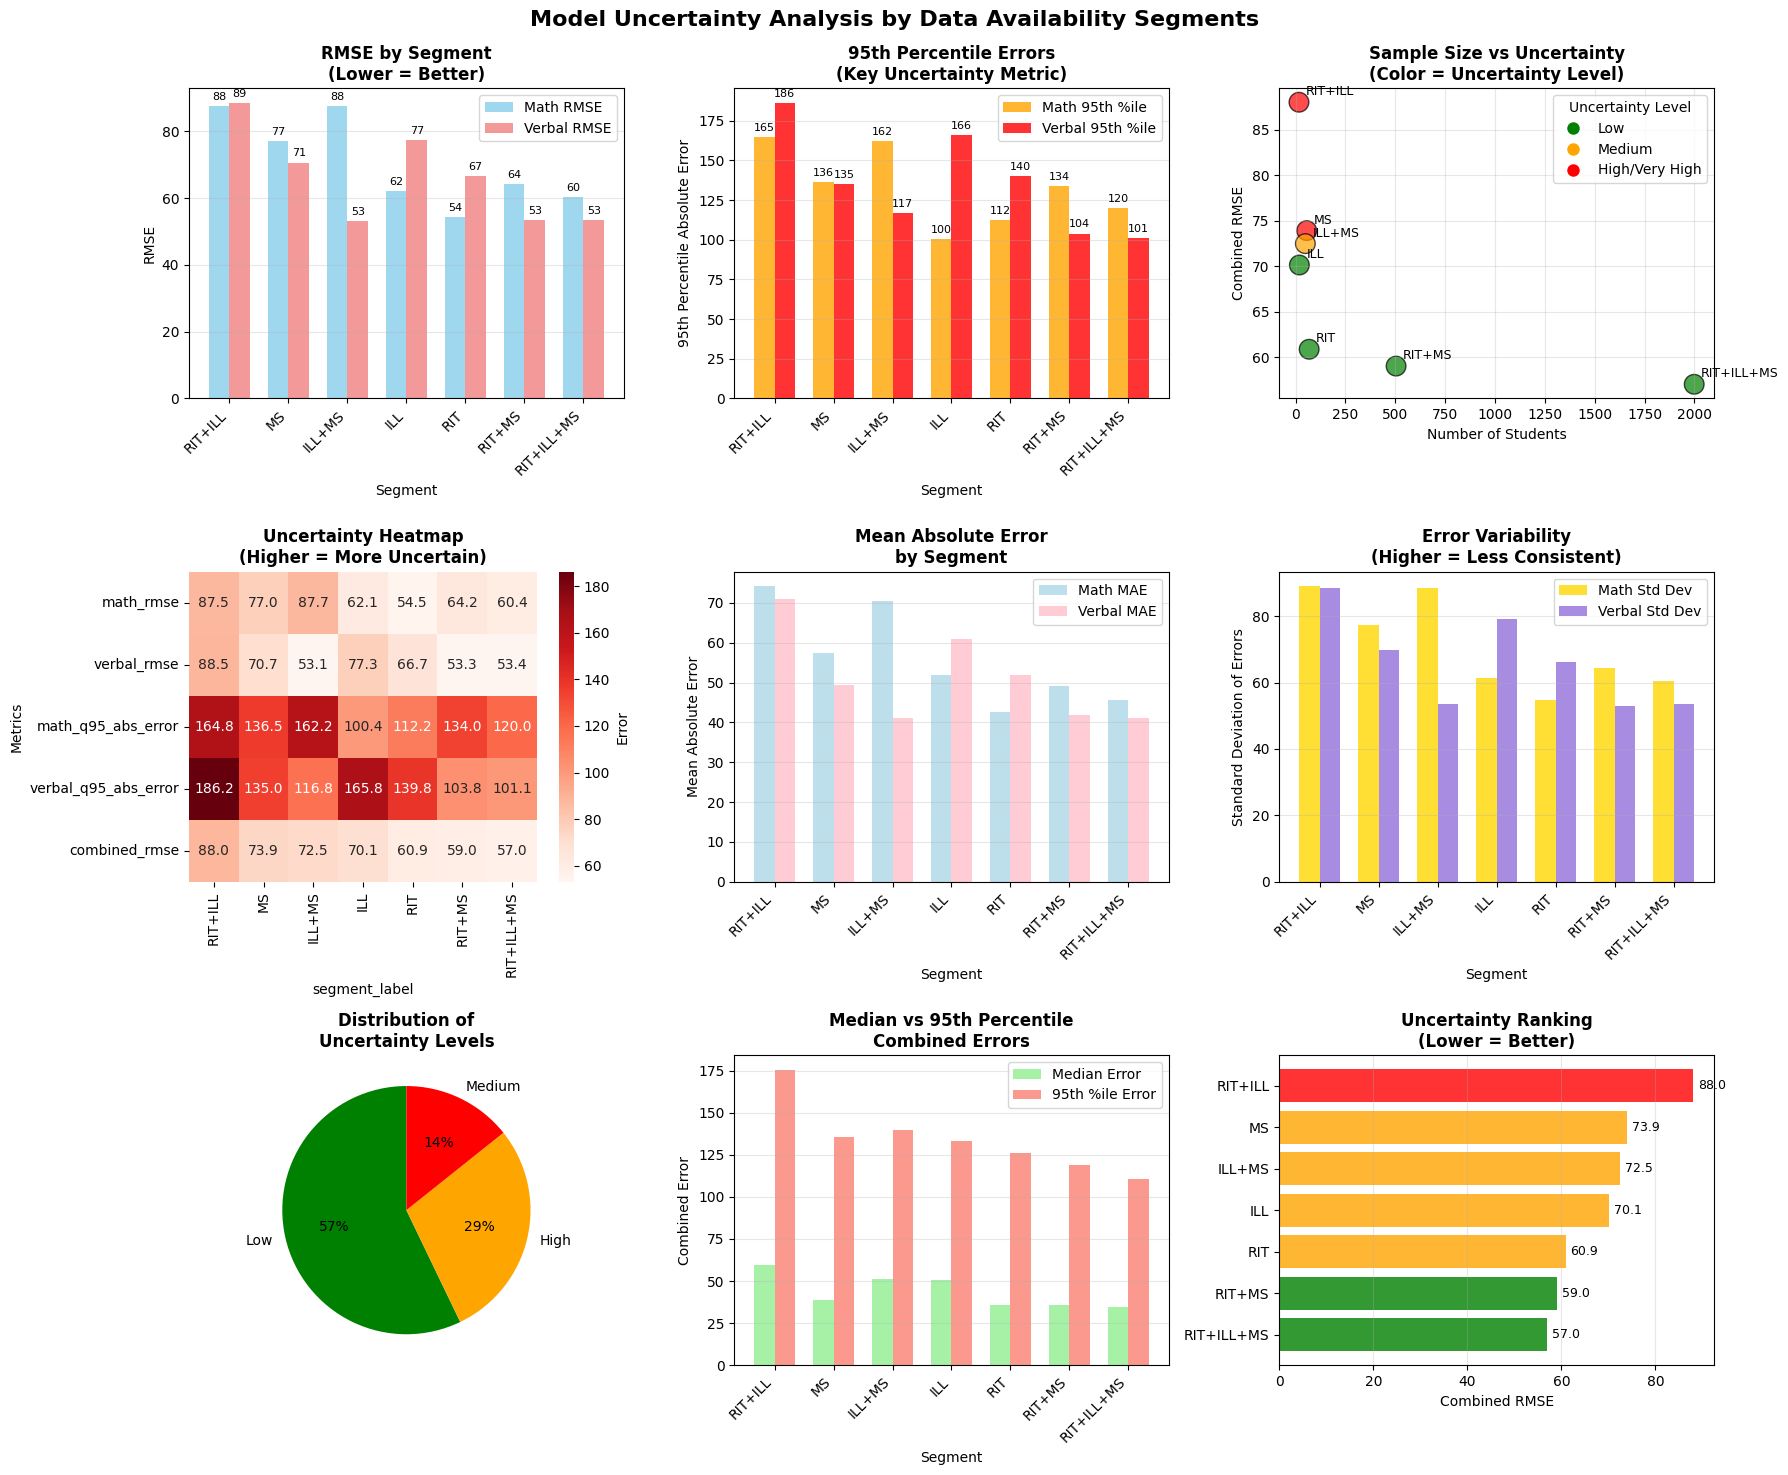

In [13]:
# Set up the plotting style
plt.style.use("default")
sns.set_palette("husl")

# Create comprehensive uncertainty dashboard
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle(
    "Model Uncertainty Analysis by Data Availability Segments",
    fontsize=16,
    fontweight="bold",
)

# 1. RMSE Comparison (Top Left)
ax1 = axes[0, 0]
x_pos = np.arange(len(uncertainty_analysis_df))
width = 0.35

bars1 = ax1.bar(
    x_pos - width / 2,
    uncertainty_analysis_df["math_rmse"],
    width,
    label="Math RMSE",
    alpha=0.8,
    color="skyblue",
)
bars2 = ax1.bar(
    x_pos + width / 2,
    uncertainty_analysis_df["verbal_rmse"],
    width,
    label="Verbal RMSE",
    alpha=0.8,
    color="lightcoral",
)

ax1.set_xlabel("Segment")
ax1.set_ylabel("RMSE")
ax1.set_title("RMSE by Segment\n(Lower = Better)", fontweight="bold")
ax1.set_xticks(x_pos)
ax1.set_xticklabels(uncertainty_analysis_df["segment_label"], rotation=45, ha="right")
ax1.legend()
ax1.grid(axis="y", alpha=0.3)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.annotate(
        f"{height:.0f}",
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=8,
    )
for bar in bars2:
    height = bar.get_height()
    ax1.annotate(
        f"{height:.0f}",
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=8,
    )

# 2. 95th Percentile Errors (Top Middle) - KEY UNCERTAINTY METRIC
ax2 = axes[0, 1]
bars1 = ax2.bar(
    x_pos - width / 2,
    uncertainty_analysis_df["math_q95_abs_error"],
    width,
    label="Math 95th %ile",
    alpha=0.8,
    color="orange",
)
bars2 = ax2.bar(
    x_pos + width / 2,
    uncertainty_analysis_df["verbal_q95_abs_error"],
    width,
    label="Verbal 95th %ile",
    alpha=0.8,
    color="red",
)

ax2.set_xlabel("Segment")
ax2.set_ylabel("95th Percentile Absolute Error")
ax2.set_title("95th Percentile Errors\n(Key Uncertainty Metric)", fontweight="bold")
ax2.set_xticks(x_pos)
ax2.set_xticklabels(uncertainty_analysis_df["segment_label"], rotation=45, ha="right")
ax2.legend()
ax2.grid(axis="y", alpha=0.3)

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax2.annotate(
        f"{height:.0f}",
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=8,
    )
for bar in bars2:
    height = bar.get_height()
    ax2.annotate(
        f"{height:.0f}",
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=8,
    )

# 3. Sample Size vs Combined RMSE (Top Right)
ax3 = axes[0, 2]
colors = [
    (
        "red"
        if level in ["High", "Very High"]
        else "orange"
        if level == "Medium"
        else "green"
    )
    for level in uncertainty_analysis_df["uncertainty_level"]
]

scatter = ax3.scatter(
    uncertainty_analysis_df["n_students"],
    uncertainty_analysis_df["combined_rmse"],
    s=200,
    alpha=0.7,
    c=colors,
    edgecolors="black",
    linewidth=1,
)

ax3.set_xlabel("Number of Students")
ax3.set_ylabel("Combined RMSE")
ax3.set_title(
    "Sample Size vs Uncertainty\n(Color = Uncertainty Level)", fontweight="bold"
)
ax3.grid(True, alpha=0.3)

# Add segment labels
for _, row in uncertainty_analysis_df.iterrows():
    ax3.annotate(
        row["segment_label"],
        (row["n_students"], row["combined_rmse"]),
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=9,
    )

# Add legend for colors
legend_elements = [
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        markerfacecolor="green",
        markersize=10,
        label="Low",
    ),
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        markerfacecolor="orange",
        markersize=10,
        label="Medium",
    ),
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        markerfacecolor="red",
        markersize=10,
        label="High/Very High",
    ),
]
ax3.legend(handles=legend_elements, title="Uncertainty Level")

# 4. Uncertainty Heatmap (Middle Left)
ax4 = axes[1, 0]
heatmap_data = uncertainty_analysis_df[
    [
        "math_rmse",
        "verbal_rmse",
        "math_q95_abs_error",
        "verbal_q95_abs_error",
        "combined_rmse",
    ]
].T
heatmap_data.columns = uncertainty_analysis_df["segment_label"]

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap="Reds",
    ax=ax4,
    cbar_kws={"label": "Error"},
)
ax4.set_title("Uncertainty Heatmap\n(Higher = More Uncertain)", fontweight="bold")
ax4.set_ylabel("Metrics")

# 5. Mean Absolute Error Comparison (Middle Center)
ax5 = axes[1, 1]
bars1 = ax5.bar(
    x_pos - width / 2,
    uncertainty_analysis_df["math_mae"],
    width,
    label="Math MAE",
    alpha=0.8,
    color="lightblue",
)
bars2 = ax5.bar(
    x_pos + width / 2,
    uncertainty_analysis_df["verbal_mae"],
    width,
    label="Verbal MAE",
    alpha=0.8,
    color="pink",
)

ax5.set_xlabel("Segment")
ax5.set_ylabel("Mean Absolute Error")
ax5.set_title("Mean Absolute Error\nby Segment", fontweight="bold")
ax5.set_xticks(x_pos)
ax5.set_xticklabels(uncertainty_analysis_df["segment_label"], rotation=45, ha="right")
ax5.legend()
ax5.grid(axis="y", alpha=0.3)

# 6. Standard Deviation of Errors (Middle Right)
ax6 = axes[1, 2]
bars1 = ax6.bar(
    x_pos - width / 2,
    uncertainty_analysis_df["math_std_error"],
    width,
    label="Math Std Dev",
    alpha=0.8,
    color="gold",
)
bars2 = ax6.bar(
    x_pos + width / 2,
    uncertainty_analysis_df["verbal_std_error"],
    width,
    label="Verbal Std Dev",
    alpha=0.8,
    color="mediumpurple",
)

ax6.set_xlabel("Segment")
ax6.set_ylabel("Standard Deviation of Errors")
ax6.set_title("Error Variability\n(Higher = Less Consistent)", fontweight="bold")
ax6.set_xticks(x_pos)
ax6.set_xticklabels(uncertainty_analysis_df["segment_label"], rotation=45, ha="right")
ax6.legend()
ax6.grid(axis="y", alpha=0.3)

# 7. Uncertainty Level Distribution (Bottom Left)
ax7 = axes[2, 0]
uncertainty_counts = uncertainty_analysis_df["uncertainty_level"].value_counts()
colors_pie = ["green", "orange", "red", "darkred"]
ax7.pie(
    uncertainty_counts.values,
    labels=uncertainty_counts.index,
    autopct="%1.0f%%",
    colors=colors_pie[: len(uncertainty_counts)],
    startangle=90,
)
ax7.set_title("Distribution of\nUncertainty Levels", fontweight="bold")

# 8. Median vs 95th Percentile Errors (Bottom Center)
ax8 = axes[2, 1]
combined_median = (
    uncertainty_analysis_df["math_median_abs_error"]
    + uncertainty_analysis_df["verbal_median_abs_error"]
) / 2
combined_q95 = (
    uncertainty_analysis_df["math_q95_abs_error"]
    + uncertainty_analysis_df["verbal_q95_abs_error"]
) / 2

bars1 = ax8.bar(
    x_pos - width / 2,
    combined_median,
    width,
    label="Median Error",
    alpha=0.8,
    color="lightgreen",
)
bars2 = ax8.bar(
    x_pos + width / 2,
    combined_q95,
    width,
    label="95th %ile Error",
    alpha=0.8,
    color="salmon",
)

ax8.set_xlabel("Segment")
ax8.set_ylabel("Combined Error")
ax8.set_title("Median vs 95th Percentile\nCombined Errors", fontweight="bold")
ax8.set_xticks(x_pos)
ax8.set_xticklabels(uncertainty_analysis_df["segment_label"], rotation=45, ha="right")
ax8.legend()
ax8.grid(axis="y", alpha=0.3)

# 9. Uncertainty Ranking (Bottom Right)
ax9 = axes[2, 2]
sorted_df = uncertainty_analysis_df.sort_values("combined_rmse", ascending=True)
colors_bar = [
    "green" if x < 60 else "orange" if x < 80 else "red"
    for x in sorted_df["combined_rmse"]
]

bars = ax9.barh(
    range(len(sorted_df)), sorted_df["combined_rmse"], color=colors_bar, alpha=0.8
)
ax9.set_yticks(range(len(sorted_df)))
ax9.set_yticklabels(sorted_df["segment_label"])
ax9.set_xlabel("Combined RMSE")
ax9.set_title("Uncertainty Ranking\n(Lower = Better)", fontweight="bold")
ax9.grid(axis="x", alpha=0.3)

# Add value labels on bars
for _, (bar, value) in enumerate(zip(bars, sorted_df["combined_rmse"])):
    ax9.text(
        value + 1,
        bar.get_y() + bar.get_height() / 2,
        f"{value:.1f}",
        va="center",
        fontsize=9,
    )

plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

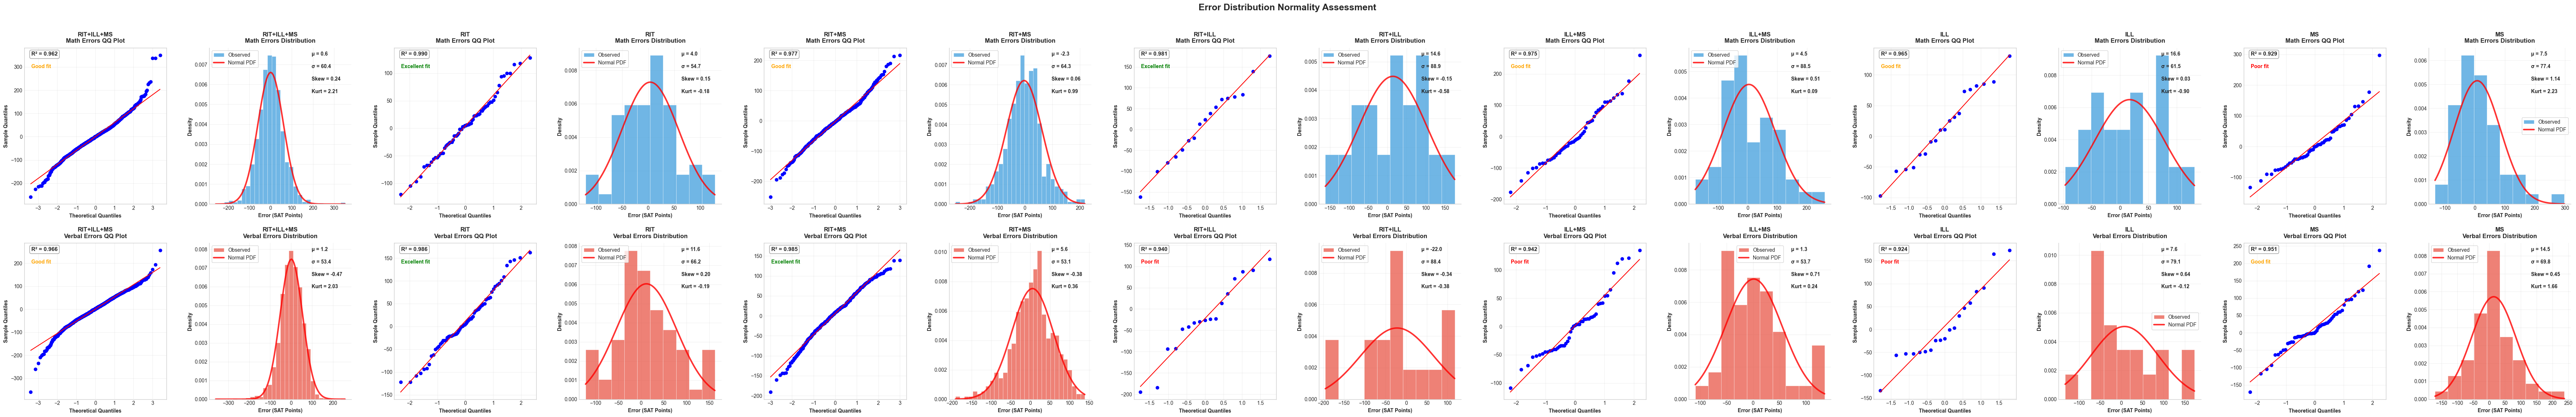


INTERPRETATION GUIDE:
QQ PLOTS (Left columns):
• R² ≥ 0.98: Excellent normal fit - Use std dev methods confidently
• R² ≥ 0.95: Good normal fit - Use std dev methods
• R² < 0.95: Poor normal fit - Use percentile methods
• Points should follow diagonal line for normal distribution

HISTOGRAMS (Right columns):
• Red line = theoretical normal distribution
• Blue/Red bars = actual error distribution
• Good fit: bars closely follow red curve
• Skew ≈ 0, Kurtosis ≈ 0 for normal distribution

LAYOUT:
• Row 1: Math errors for all segments
• Row 2: Verbal errors for all segments
• Each segment: QQ plot (left) + PDF plot (right)


In [14]:
def create_simple_normality_plots(analysis_df):
    """
    Create clean QQ plots and normal PDF overlays for normality assessment
    Layout: Each segment has QQ plot (left) and PDF plot (right) side by side
    """

    # Add segment labels
    analysis_df_with_segments = analysis_df.copy()

    def create_segment_label(row):
        assessments = []
        if row["has_rit"]:
            assessments.append("RIT")
        if row["has_illuminate"]:
            assessments.append("ILL")
        if row["has_milestone"]:
            assessments.append("MS")
        return "+".join(assessments) if assessments else "None"

    analysis_df_with_segments["segment"] = analysis_df_with_segments.apply(
        create_segment_label, axis=1
    )

    # Get unique segments
    segments = analysis_df_with_segments["segment"].unique()
    n_segments = len(segments)

    # Set up plotting style
    plt.style.use("seaborn-v0_8-whitegrid")

    # Create the plot grid: 2 rows x (2 * n_segments) columns
    # Each segment gets 2 columns: QQ plot (left) and PDF plot (right)
    # Row 1: Math errors
    # Row 2: Verbal errors
    fig, axes = plt.subplots(2, 2 * n_segments, figsize=(10 * n_segments, 12))
    fig.suptitle(
        "Error Distribution Normality Assessment",
        fontsize=18,
        fontweight="bold",
        y=0.96,
    )

    # Ensure axes is 2D even with single segment
    if n_segments == 1:
        axes = axes.reshape(2, -1)

    # 1. MATH ERRORS (Row 1)
    for i, segment in enumerate(segments):
        segment_data = analysis_df_with_segments[
            analysis_df_with_segments["segment"] == segment
        ]

        if len(segment_data) > 3:
            errors = segment_data["error_math"]

            # QQ Plot (left column for this segment)
            ax_qq = axes[0, i * 2]
            stats.probplot(errors, dist="norm", plot=ax_qq)

            # Calculate R-squared for goodness of fit
            sorted_errors = np.sort(errors)
            theoretical_quantiles = stats.norm.ppf(
                np.linspace(0.01, 0.99, len(segment_data))
            )
            corr_coef = stats.pearsonr(sorted_errors, theoretical_quantiles)[0]
            r_squared = corr_coef**2

            ax_qq.set_title(
                f"{segment}\nMath Errors QQ Plot",
                fontsize=12,
                fontweight="bold",
                pad=10,
            )
            ax_qq.set_xlabel("Theoretical Quantiles", fontweight="bold")
            ax_qq.set_ylabel("Sample Quantiles", fontweight="bold")
            ax_qq.grid(True, alpha=0.3)

            # Add R-squared annotation
            ax_qq.text(
                0.05,
                0.95,
                f"R² = {r_squared:.3f}",
                transform=ax_qq.transAxes,
                fontsize=11,
                fontweight="bold",
                bbox={
                    "boxstyle": "round,pad=0.3",
                    "facecolor": "white",
                    "alpha": 0.8,
                    "edgecolor": "gray",
                },
            )

            # Color code the R-squared
            if r_squared >= 0.98:
                ax_qq.text(
                    0.05,
                    0.87,
                    "Excellent fit",
                    transform=ax_qq.transAxes,
                    fontsize=10,
                    color="green",
                    fontweight="bold",
                )
            elif r_squared >= 0.95:
                ax_qq.text(
                    0.05,
                    0.87,
                    "Good fit",
                    transform=ax_qq.transAxes,
                    fontsize=10,
                    color="orange",
                    fontweight="bold",
                )
            else:
                ax_qq.text(
                    0.05,
                    0.87,
                    "Poor fit",
                    transform=ax_qq.transAxes,
                    fontsize=10,
                    color="red",
                    fontweight="bold",
                )

            # PDF Plot (right column for this segment)
            ax_pdf = axes[0, i * 2 + 1]

            # Create histogram
            n_bins = min(30, max(10, len(errors) // 10))
            ax_pdf.hist(
                errors,
                bins=n_bins,
                density=True,
                alpha=0.7,
                color="#3498db",
                edgecolor="white",
                linewidth=0.5,
                label="Observed",
            )

            # Overlay theoretical normal distribution
            mu, sigma = errors.mean(), errors.std()
            x = np.linspace(errors.min(), errors.max(), 100)
            normal_pdf = stats.norm.pdf(x, mu, sigma)
            ax_pdf.plot(x, normal_pdf, "r-", linewidth=3, label="Normal PDF", alpha=0.8)

            ax_pdf.set_title(
                f"{segment}\nMath Errors Distribution",
                fontsize=12,
                fontweight="bold",
                pad=10,
            )
            ax_pdf.set_xlabel("Error (SAT Points)", fontweight="bold")
            ax_pdf.set_ylabel("Density", fontweight="bold")
            ax_pdf.legend(frameon=True, fancybox=True, shadow=False)
            ax_pdf.grid(True, alpha=0.3)
            ax_pdf.spines["top"].set_visible(False)
            ax_pdf.spines["right"].set_visible(False)

            # Add distribution statistics
            skewness = stats.skew(errors)
            kurtosis = stats.kurtosis(errors)
            ax_pdf.text(
                0.72,
                0.95,
                f"μ = {mu:.1f}",
                transform=ax_pdf.transAxes,
                fontsize=10,
                fontweight="bold",
            )
            ax_pdf.text(
                0.72,
                0.87,
                f"σ = {sigma:.1f}",
                transform=ax_pdf.transAxes,
                fontsize=10,
                fontweight="bold",
            )
            ax_pdf.text(
                0.72,
                0.79,
                f"Skew = {skewness:.2f}",
                transform=ax_pdf.transAxes,
                fontsize=10,
                fontweight="bold",
            )
            ax_pdf.text(
                0.72,
                0.71,
                f"Kurt = {kurtosis:.2f}",
                transform=ax_pdf.transAxes,
                fontsize=10,
                fontweight="bold",
            )

    # 2. VERBAL ERRORS (Row 2)
    for i, segment in enumerate(segments):
        segment_data = analysis_df_with_segments[
            analysis_df_with_segments["segment"] == segment
        ]

        if len(segment_data) > 3:
            errors = segment_data["error_verbal"]

            # QQ Plot (left column for this segment)
            ax_qq = axes[1, i * 2]
            stats.probplot(errors, dist="norm", plot=ax_qq)

            # Calculate R-squared
            sorted_errors = np.sort(errors)
            theoretical_quantiles = stats.norm.ppf(
                np.linspace(0.01, 0.99, len(segment_data))
            )
            corr_coef = stats.pearsonr(sorted_errors, theoretical_quantiles)[0]
            r_squared = corr_coef**2

            ax_qq.set_title(
                f"{segment}\nVerbal Errors QQ Plot",
                fontsize=12,
                fontweight="bold",
                pad=10,
            )
            ax_qq.set_xlabel("Theoretical Quantiles", fontweight="bold")
            ax_qq.set_ylabel("Sample Quantiles", fontweight="bold")
            ax_qq.grid(True, alpha=0.3)

            # Add R-squared annotation
            ax_qq.text(
                0.05,
                0.95,
                f"R² = {r_squared:.3f}",
                transform=ax_qq.transAxes,
                fontsize=11,
                fontweight="bold",
                bbox={
                    "boxstyle": "round,pad=0.3",
                    "facecolor": "white",
                    "alpha": 0.8,
                    "edgecolor": "gray",
                },
            )

            # Color code the R-squared
            if r_squared >= 0.98:
                ax_qq.text(
                    0.05,
                    0.87,
                    "Excellent fit",
                    transform=ax_qq.transAxes,
                    fontsize=10,
                    color="green",
                    fontweight="bold",
                )
            elif r_squared >= 0.95:
                ax_qq.text(
                    0.05,
                    0.87,
                    "Good fit",
                    transform=ax_qq.transAxes,
                    fontsize=10,
                    color="orange",
                    fontweight="bold",
                )
            else:
                ax_qq.text(
                    0.05,
                    0.87,
                    "Poor fit",
                    transform=ax_qq.transAxes,
                    fontsize=10,
                    color="red",
                    fontweight="bold",
                )

            # PDF Plot (right column for this segment)
            ax_pdf = axes[1, i * 2 + 1]

            # Create histogram
            n_bins = min(30, max(10, len(errors) // 10))
            ax_pdf.hist(
                errors,
                bins=n_bins,
                density=True,
                alpha=0.7,
                color="#e74c3c",
                edgecolor="white",
                linewidth=0.5,
                label="Observed",
            )

            # Overlay theoretical normal distribution
            mu, sigma = errors.mean(), errors.std()
            x = np.linspace(errors.min(), errors.max(), 100)
            normal_pdf = stats.norm.pdf(x, mu, sigma)
            ax_pdf.plot(x, normal_pdf, "r-", linewidth=3, label="Normal PDF", alpha=0.8)

            ax_pdf.set_title(
                f"{segment}\nVerbal Errors Distribution",
                fontsize=12,
                fontweight="bold",
                pad=10,
            )
            ax_pdf.set_xlabel("Error (SAT Points)", fontweight="bold")
            ax_pdf.set_ylabel("Density", fontweight="bold")
            ax_pdf.legend(frameon=True, fancybox=True, shadow=False)
            ax_pdf.grid(True, alpha=0.3)
            ax_pdf.spines["top"].set_visible(False)
            ax_pdf.spines["right"].set_visible(False)

            # Add distribution statistics
            skewness = stats.skew(errors)
            kurtosis = stats.kurtosis(errors)
            ax_pdf.text(
                0.72,
                0.95,
                f"μ = {mu:.1f}",
                transform=ax_pdf.transAxes,
                fontsize=10,
                fontweight="bold",
            )
            ax_pdf.text(
                0.72,
                0.87,
                f"σ = {sigma:.1f}",
                transform=ax_pdf.transAxes,
                fontsize=10,
                fontweight="bold",
            )
            ax_pdf.text(
                0.72,
                0.79,
                f"Skew = {skewness:.2f}",
                transform=ax_pdf.transAxes,
                fontsize=10,
                fontweight="bold",
            )
            ax_pdf.text(
                0.72,
                0.71,
                f"Kurt = {kurtosis:.2f}",
                transform=ax_pdf.transAxes,
                fontsize=10,
                fontweight="bold",
            )

    # Adjust layout
    plt.tight_layout(rect=[0, 0.02, 1, 0.94])
    plt.subplots_adjust(hspace=0.25, wspace=0.3)

    plt.show()


# Create the simplified normality plots
create_simple_normality_plots(analysis_df)

print("\nINTERPRETATION GUIDE:")
print("=" * 50)
print("QQ PLOTS (Left columns):")
print("• R² ≥ 0.98: Excellent normal fit - Use std dev methods confidently")
print("• R² ≥ 0.95: Good normal fit - Use std dev methods")
print("• R² < 0.95: Poor normal fit - Use percentile methods")
print("• Points should follow diagonal line for normal distribution")
print()
print("HISTOGRAMS (Right columns):")
print("• Red line = theoretical normal distribution")
print("• Blue/Red bars = actual error distribution")
print("• Good fit: bars closely follow red curve")
print("• Skew ≈ 0, Kurtosis ≈ 0 for normal distribution")
print()
print("LAYOUT:")
print("• Row 1: Math errors for all segments")
print("• Row 2: Verbal errors for all segments")
print("• Each segment: QQ plot (left) + PDF plot (right)")

In [15]:
def create_threshold_dataframe_with_qq_r2_assessment(
    analysis_df,
    uncertainty_analysis_df,
):
    """
    Create a dataframe with threshold values using 1 std dev for good QQ plot fits (R² ≥ 0.95)
    and corresponding percentiles for poor fits, for common standard deviation thresholds.
    """

    # Add segment labels to analysis_df
    analysis_df_with_segments = analysis_df.copy()

    def create_segment_label(row):
        assessments = []
        if row["has_rit"]:
            assessments.append("RIT")
        if row["has_illuminate"]:
            assessments.append("ILL")
        if row["has_milestone"]:
            assessments.append("MS")
        return "+".join(assessments) if assessments else "None"

    analysis_df_with_segments["segment"] = analysis_df_with_segments.apply(
        create_segment_label,
        axis=1,
    )

    # Define common standard deviation thresholds
    std_thresholds = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]

    # Map std dev to percentiles (assuming normal distribution)
    # For +/- k standard deviations, the percentiles are:
    std_to_percentile = {
        0.5: {"lower": 30.85, "upper": 69.15},  # ±0.5σ
        1.0: {"lower": 15.87, "upper": 84.13},  # ±1σ
        1.5: {"lower": 6.68, "upper": 93.32},  # ±1.5σ
        2.0: {"lower": 2.28, "upper": 97.72},  # ±2σ
        2.5: {"lower": 0.62, "upper": 99.38},  # ±2.5σ
        3.0: {"lower": 0.13, "upper": 99.87},  # ±3σ
    }

    def calculate_qq_r_squared(errors):
        """Calculate R² from QQ plot for normality assessment"""
        if len(errors) < 8:  # Need minimum sample size
            return 0.0

        sorted_errors = np.sort(errors)
        theoretical_quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, len(errors)))
        corr_coef = stats.pearsonr(sorted_errors, theoretical_quantiles)[0]
        r_squared = corr_coef**2
        return r_squared

    threshold_results = []

    # Get unique segments
    segments = analysis_df_with_segments["segment"].unique()

    for segment in segments:
        segment_data = analysis_df_with_segments[
            analysis_df_with_segments["segment"] == segment
        ]

        if len(segment_data) < 5:  # Skip segments with too few samples
            continue

        # Get error data
        math_errors = segment_data["error_math"]
        verbal_errors = segment_data["error_verbal"]

        # Calculate QQ plot R² for both math and verbal errors
        math_r2 = calculate_qq_r_squared(math_errors)
        verbal_r2 = calculate_qq_r_squared(verbal_errors)

        # Get uncertainty metrics
        uncertainty_row = uncertainty_analysis_df[
            uncertainty_analysis_df["segment_label"] == segment
        ]

        if len(uncertainty_row) == 0:
            continue

        uncertainty_row = uncertainty_row.iloc[0]

        # Determine if std dev or percentiles be used based on R²
        # Use more conservative thresholds: R² ≥ 0.95 for std_dev
        math_use_std = math_r2 >= 0.95
        verbal_use_std = verbal_r2 >= 0.95

        # Determine method labels and recommendations
        if math_r2 >= 0.98:
            math_qq_assessment = "Excellent"
        elif math_r2 >= 0.95:
            math_qq_assessment = "Good"
        else:
            math_qq_assessment = "Poor"

        if verbal_r2 >= 0.98:
            verbal_qq_assessment = "Excellent"
        elif verbal_r2 >= 0.95:
            verbal_qq_assessment = "Good"
        else:
            verbal_qq_assessment = "Poor"

        # Calculate thresholds for each std deviation level
        for std_level in std_thresholds:
            # MATH THRESHOLDS
            if math_use_std:
                # Use standard deviation method
                math_mean = math_errors.mean()
                math_std = math_errors.std()
                math_lower_threshold = math_mean - (std_level * math_std)
                math_upper_threshold = math_mean + (std_level * math_std)
                math_method = "std_dev"
            else:
                # Use percentile method
                lower_pct = std_to_percentile[std_level]["lower"]
                upper_pct = std_to_percentile[std_level]["upper"]
                math_lower_threshold = np.percentile(math_errors, lower_pct)
                math_upper_threshold = np.percentile(math_errors, upper_pct)
                math_method = "percentile"

            # VERBAL THRESHOLDS
            if verbal_use_std:
                # Use standard deviation method
                verbal_mean = verbal_errors.mean()
                verbal_std = verbal_errors.std()
                verbal_lower_threshold = verbal_mean - (std_level * verbal_std)
                verbal_upper_threshold = verbal_mean + (std_level * verbal_std)
                verbal_method = "std_dev"
            else:
                # Use percentile method
                lower_pct = std_to_percentile[std_level]["lower"]
                upper_pct = std_to_percentile[std_level]["upper"]
                verbal_lower_threshold = np.percentile(verbal_errors, lower_pct)
                verbal_upper_threshold = np.percentile(verbal_errors, upper_pct)
                verbal_method = "percentile"

            # Calculate what percentage of errors fall within these thresholds
            math_within_threshold = (
                (math_errors >= math_lower_threshold)
                & (math_errors <= math_upper_threshold)
            ).mean() * 100

            verbal_within_threshold = (
                (verbal_errors >= verbal_lower_threshold)
                & (verbal_errors <= verbal_upper_threshold)
            ).mean() * 100

            threshold_results.append(
                {
                    "segment": segment,
                    "has_rit": segment_data["has_rit"].iloc[0],
                    "has_illuminate": segment_data["has_illuminate"].iloc[0],
                    "has_milestone": segment_data["has_milestone"].iloc[0],
                    "std_level": std_level,
                    "n_students": len(segment_data),
                    # Math thresholds
                    "math_method": math_method,
                    "math_lower_threshold": math_lower_threshold,
                    "math_upper_threshold": math_upper_threshold,
                    "math_threshold_range": math_upper_threshold - math_lower_threshold,
                    "math_pct_within_threshold": math_within_threshold,
                    "math_mean_error": math_errors.mean(),
                    "math_std_error": math_errors.std(),
                    "math_qq_r2": math_r2,
                    "math_qq_assessment": math_qq_assessment,
                    # Verbal thresholds
                    "verbal_method": verbal_method,
                    "verbal_lower_threshold": verbal_lower_threshold,
                    "verbal_upper_threshold": verbal_upper_threshold,
                    "verbal_threshold_range": verbal_upper_threshold
                    - verbal_lower_threshold,
                    "verbal_pct_within_threshold": verbal_within_threshold,
                    "verbal_mean_error": verbal_errors.mean(),
                    "verbal_std_error": verbal_errors.std(),
                    "verbal_qq_r2": verbal_r2,
                    "verbal_qq_assessment": verbal_qq_assessment,
                    # Combined metrics from uncertainty analysis
                    "combined_rmse": uncertainty_row["combined_rmse"],
                    "uncertainty_level": uncertainty_row["uncertainty_level"],
                }
            )

    threshold_df = pd.DataFrame(threshold_results)

    # Round numerical columns for better display
    numerical_cols = [
        "math_lower_threshold",
        "math_upper_threshold",
        "math_threshold_range",
        "math_pct_within_threshold",
        "math_mean_error",
        "math_std_error",
        "math_qq_r2",
        "verbal_lower_threshold",
        "verbal_upper_threshold",
        "verbal_threshold_range",
        "verbal_pct_within_threshold",
        "verbal_mean_error",
        "verbal_std_error",
        "verbal_qq_r2",
        "combined_rmse",
    ]

    for col in numerical_cols:
        if col in threshold_df.columns:
            threshold_df[col] = threshold_df[col].round(4)

    # Save the threshold dataframe as parquet
    threshold_df.to_parquet("data/cleaned/threshold_df.parquet", index=False)

    return threshold_df


# Create the threshold dataframe using QQ plot R²
threshold_df = create_threshold_dataframe_with_qq_r2_assessment(
    analysis_df,
    uncertainty_analysis_df,
)

print("ADAPTIVE THRESHOLD DATAFRAME (QQ Plot R² Based)")
print("=" * 80)
print(
    "Uses std dev for R² ≥ 0.95 (good normal fit), percentiles for R² < 0.95 (poor fit)"
)
print()

# Show detailed view for each threshold level
for std_level in [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]:
    print(f"\nDETAILED VIEW: {std_level}σ THRESHOLDS")
    print("=" * 80)

    level_data = threshold_df[threshold_df["std_level"] == std_level].copy()
    level_data = level_data.sort_values("combined_rmse", ascending=False)

    display(level_data)

print("\nINTERPRETATION GUIDE:")
print("=" * 50)
print("METHOD SELECTION (QQ Plot R² Based):")
print("• 'std_dev': Uses mean ± k×σ (for R² ≥ 0.95 = good normal fit)")
print("• 'percentile': Uses equivalent percentiles (for R² < 0.95 = poor fit)")
print()
print("QQ PLOT ASSESSMENT:")
print("• R² ≥ 0.98: Excellent normal fit")
print("• R² ≥ 0.95: Good normal fit")
print("• R² < 0.95: Poor normal fit")
print()
print("THRESHOLD RANGES:")
print("• Smaller range = more precise predictions")
print("• Larger range = more uncertainty but captures more students")
print()
print("PERCENTAGE WITHIN THRESHOLD:")
print("• Should be close to expected theoretical percentages:")
print("  - 0.5σ: ~38% of students")
print("  - 1σ: ~68% of students")
print("  - 1.5σ: ~87% of students")
print("  - 2σ: ~95% of students")
print("  - 2.5σ: ~99% of students")
print("  - 3σ: ~99.7% of students")
print()
print("UNCERTAINTY LEVELS:")
print("• Low: High confidence segments")
print("• Medium: Moderate confidence segments")
print("• High: Lower confidence segments")
print()
print("THRESHOLD INTERPRETATION:")
print("• math_lower_threshold: Lower bound (underpredictions beyond k×σ)")
print("• math_upper_threshold: Upper bound (overpredictions beyond k×σ)")
print("• Range shows prediction uncertainty width at k×σ level")

ADAPTIVE THRESHOLD DATAFRAME (QQ Plot R² Based)
Uses std dev for R² ≥ 0.95 (good normal fit), percentiles for R² < 0.95 (poor fit)


DETAILED VIEW: 0.5σ THRESHOLDS


,segment,has_rit,has_illuminate,has_milestone,std_level,n_students,math_method,math_lower_threshold,math_upper_threshold,math_threshold_range,math_pct_within_threshold,math_mean_error,math_std_error,math_qq_r2,math_qq_assessment,verbal_method,verbal_lower_threshold,verbal_upper_threshold,verbal_threshold_range,verbal_pct_within_threshold,verbal_mean_error,verbal_std_error,verbal_qq_r2,verbal_qq_assessment,combined_rmse,uncertainty_level
18,RIT+ILL,True,True,False,0.5,17,std_dev,-29.8847,59.0612,88.9460,35.2941,14.5882,88.9460,0.9808,Excellent,percentile,-42.3200,14.4720,56.7920,41.1765,-22.0000,88.4011,0.9396,Poor,88.03,High
36,MS,False,False,True,0.5,56,percentile,-36.0650,23.1625,59.2275,39.2857,7.5000,77.3756,0.9294,Poor,std_dev,-20.3503,49.4218,69.7721,51.7857,14.5357,69.7721,0.9506,Good,73.92,High
24,ILL+MS,False,True,True,0.5,49,std_dev,-39.7253,48.7457,88.4711,36.7347,4.5102,88.4711,0.9748,Good,percentile,-34.1920,14.3840,48.5760,38.7755,1.3265,53.6584,0.9417,Poor,72.49,Medium
30,ILL,False,True,False,0.5,19,std_dev,-14.1234,47.3865,61.5099,36.8421,16.6316,61.5099,0.9652,Good,percentile,-46.3410,37.5990,83.9400,36.8421,7.5789,79.0544,0.9237,Poor,70.14,Low
6,RIT,True,False,False,0.5,68,std_dev,-23.3360,31.3655,54.7015,38.2353,4.0147,54.7015,0.9900,Excellent,std_dev,-21.5300,44.6476,66.1776,42.6471,11.5588,66.1776,0.9861,Excellent,60.88,Low
12,RIT+MS,True,False,True,0.5,504,std_dev,-34.4662,29.7995,64.2657,42.0635,-2.3333,64.2657,0.9775,Good,std_dev,-20.9142,32.1563,53.0705,42.4603,5.6210,53.0705,0.9851,Excellent,59.03,Low
0,RIT+ILL+MS,True,True,True,0.5,1999,std_dev,-29.6605,30.7640,60.4245,43.3717,0.5518,60.4245,0.9622,Good,std_dev,-25.5579,27.8680,53.4259,40.7204,1.1551,53.4259,0.9659,Good,57.03,Low



DETAILED VIEW: 1.0σ THRESHOLDS


,segment,has_rit,has_illuminate,has_milestone,std_level,n_students,math_method,math_lower_threshold,math_upper_threshold,math_threshold_range,math_pct_within_threshold,math_mean_error,math_std_error,math_qq_r2,math_qq_assessment,verbal_method,verbal_lower_threshold,verbal_upper_threshold,verbal_threshold_range,verbal_pct_within_threshold,verbal_mean_error,verbal_std_error,verbal_qq_r2,verbal_qq_assessment,combined_rmse,uncertainty_level
19,RIT+ILL,True,True,False,1.0,17,std_dev,-74.3577,103.5342,177.8919,70.5882,14.5882,88.9460,0.9808,Excellent,percentile,-93.4608,78.8336,172.2944,64.7059,-22.0000,88.4011,0.9396,Poor,88.03,High
37,MS,False,False,True,1.0,56,percentile,-61.3575,70.2715,131.6290,67.8571,7.5000,77.3756,0.9294,Poor,std_dev,-55.2364,84.3078,139.5442,73.2143,14.5357,69.7721,0.9506,Good,73.92,High
25,ILL+MS,False,True,True,1.0,49,std_dev,-83.9609,92.9813,176.9421,65.3061,4.5102,88.4711,0.9748,Good,percentile,-45.0000,46.5888,91.5888,69.3878,1.3265,53.6584,0.9417,Poor,72.49,Medium
31,ILL,False,True,False,1.0,19,std_dev,-44.8783,78.1415,123.0198,57.8947,16.6316,61.5099,0.9652,Good,percentile,-53.0000,84.1472,137.1472,73.6842,7.5789,79.0544,0.9237,Poor,70.14,Low
7,RIT,True,False,False,1.0,68,std_dev,-50.6868,58.7162,109.4030,70.5882,4.0147,54.7015,0.9900,Excellent,std_dev,-54.6188,77.7364,132.3552,70.5882,11.5588,66.1776,0.9861,Excellent,60.88,Low
13,RIT+MS,True,False,True,1.0,504,std_dev,-66.5990,61.9324,128.5314,73.8095,-2.3333,64.2657,0.9775,Good,std_dev,-47.4495,58.6915,106.1410,70.2381,5.6210,53.0705,0.9851,Excellent,59.03,Low
1,RIT+ILL+MS,True,True,True,1.0,1999,std_dev,-59.8727,60.9763,120.8490,72.4362,0.5518,60.4245,0.9622,Good,std_dev,-52.2708,54.5810,106.8518,70.8854,1.1551,53.4259,0.9659,Good,57.03,Low



DETAILED VIEW: 1.5σ THRESHOLDS


,segment,has_rit,has_illuminate,has_milestone,std_level,n_students,math_method,math_lower_threshold,math_upper_threshold,math_threshold_range,math_pct_within_threshold,math_mean_error,math_std_error,math_qq_r2,math_qq_assessment,verbal_method,verbal_lower_threshold,verbal_upper_threshold,verbal_threshold_range,verbal_pct_within_threshold,verbal_mean_error,verbal_std_error,verbal_qq_r2,verbal_qq_assessment,combined_rmse,uncertainty_level
20,RIT+ILL,True,True,False,1.5,17,std_dev,-118.8307,148.0072,266.8379,88.2353,14.5882,88.9460,0.9808,Excellent,percentile,-177.8080,90.7936,268.6016,76.4706,-22.0000,88.4011,0.9396,Poor,88.03,High
38,MS,False,False,True,1.5,56,percentile,-80.2380,131.3260,211.5640,85.7143,7.5000,77.3756,0.9294,Poor,std_dev,-90.1224,119.1938,209.3163,87.5000,14.5357,69.7721,0.9506,Good,73.92,High
26,ILL+MS,False,True,True,1.5,49,std_dev,-128.1964,137.2168,265.4132,91.8367,4.5102,88.4711,0.9748,Good,percentile,-53.5872,108.4912,162.0784,83.6735,1.3265,53.6584,0.9417,Poor,72.49,Medium
32,ILL,False,True,False,1.5,19,std_dev,-75.6333,108.8964,184.5297,89.4737,16.6316,61.5099,0.9652,Good,percentile,-55.3928,150.0224,205.4152,78.9474,7.5789,79.0544,0.9237,Poor,70.14,Low
8,RIT,True,False,False,1.5,68,std_dev,-78.0375,86.0669,164.1045,83.8235,4.0147,54.7015,0.9900,Excellent,std_dev,-87.7076,110.8252,198.5328,83.8235,11.5588,66.1776,0.9861,Excellent,60.88,Low
14,RIT+MS,True,False,True,1.5,504,std_dev,-98.7319,94.0652,192.7971,86.9048,-2.3333,64.2657,0.9775,Good,std_dev,-73.9847,85.2268,159.2115,86.3095,5.6210,53.0705,0.9851,Excellent,59.03,Low
2,RIT+ILL+MS,True,True,True,1.5,1999,std_dev,-90.0850,91.1885,181.2735,88.3942,0.5518,60.4245,0.9622,Good,std_dev,-78.9838,81.2939,160.2777,88.3942,1.1551,53.4259,0.9659,Good,57.03,Low



DETAILED VIEW: 2.0σ THRESHOLDS


,segment,has_rit,has_illuminate,has_milestone,std_level,n_students,math_method,math_lower_threshold,math_upper_threshold,math_threshold_range,math_pct_within_threshold,math_mean_error,math_std_error,math_qq_r2,math_qq_assessment,verbal_method,verbal_lower_threshold,verbal_upper_threshold,verbal_threshold_range,verbal_pct_within_threshold,verbal_mean_error,verbal_std_error,verbal_qq_r2,verbal_qq_assessment,combined_rmse,uncertainty_level
21,RIT+ILL,True,True,False,2.0,17,std_dev,-163.3037,192.4801,355.7838,100.0000,14.5882,88.9460,0.9808,Excellent,percentile,-190.9872,107.5152,298.5024,88.2353,-22.0000,88.4011,0.9396,Poor,88.03,High
39,MS,False,False,True,2.0,56,percentile,-105.4120,170.1260,275.5380,92.8571,7.5000,77.3756,0.9294,Poor,std_dev,-125.0085,154.0799,279.0883,94.6429,14.5357,69.7721,0.9506,Good,73.92,High
27,ILL+MS,False,True,True,2.0,49,std_dev,-172.4319,181.4523,353.8843,95.9184,4.5102,88.4711,0.9748,Good,percentile,-75.3392,120.9056,196.2448,91.8367,1.3265,53.6584,0.9417,Poor,72.49,Medium
33,ILL,False,True,False,2.0,19,std_dev,-106.3882,139.6514,246.0396,100.0000,16.6316,61.5099,0.9652,Good,percentile,-101.3992,169.7168,271.1160,89.4737,7.5789,79.0544,0.9237,Poor,70.14,Low
9,RIT,True,False,False,2.0,68,std_dev,-105.3883,113.4177,218.8060,94.1176,4.0147,54.7015,0.9900,Excellent,std_dev,-120.7964,143.9140,264.7104,92.6471,11.5588,66.1776,0.9861,Excellent,60.88,Low
15,RIT+MS,True,False,True,2.0,504,std_dev,-130.8647,126.1981,257.0628,94.0476,-2.3333,64.2657,0.9775,Good,std_dev,-100.5200,111.7620,212.2820,95.2381,5.6210,53.0705,0.9851,Excellent,59.03,Low
3,RIT+ILL+MS,True,True,True,2.0,1999,std_dev,-120.2972,121.4007,241.6979,95.1976,0.5518,60.4245,0.9622,Good,std_dev,-105.6968,108.0069,213.7037,95.8979,1.1551,53.4259,0.9659,Good,57.03,Low



DETAILED VIEW: 2.5σ THRESHOLDS


,segment,has_rit,has_illuminate,has_milestone,std_level,n_students,math_method,math_lower_threshold,math_upper_threshold,math_threshold_range,math_pct_within_threshold,math_mean_error,math_std_error,math_qq_r2,math_qq_assessment,verbal_method,verbal_lower_threshold,verbal_upper_threshold,verbal_threshold_range,verbal_pct_within_threshold,verbal_mean_error,verbal_std_error,verbal_qq_r2,verbal_qq_assessment,combined_rmse,uncertainty_level
22,RIT+ILL,True,True,False,2.5,17,std_dev,-207.7766,236.9531,444.7298,100.0000,14.5882,88.9460,0.9808,Excellent,percentile,-193.9088,114.4208,308.3296,88.2353,-22.0000,88.4011,0.9396,Poor,88.03,High
40,MS,False,False,True,2.5,56,percentile,-125.4980,257.0800,382.5780,96.4286,7.5000,77.3756,0.9294,Poor,std_dev,-159.8945,188.9659,348.8604,94.6429,14.5357,69.7721,0.9506,Good,73.92,High
28,ILL+MS,False,True,True,2.5,49,std_dev,-216.6675,225.6879,442.3553,97.9592,4.5102,88.4711,0.9748,Good,percentile,-99.1792,130.8336,230.0128,95.9184,1.3265,53.6584,0.9417,Poor,72.49,Medium
34,ILL,False,True,False,2.5,19,std_dev,-137.1432,170.4063,307.5495,100.0000,16.6316,61.5099,0.9652,Good,percentile,-124.4068,172.1072,296.5140,89.4737,7.5789,79.0544,0.9237,Poor,70.14,Low
10,RIT,True,False,False,2.5,68,std_dev,-132.7390,140.7684,273.5075,100.0000,4.0147,54.7015,0.9900,Excellent,std_dev,-153.8852,177.0028,330.8880,100.0000,11.5588,66.1776,0.9861,Excellent,60.88,Low
16,RIT+MS,True,False,True,2.5,504,std_dev,-162.9976,158.3309,321.3285,97.8175,-2.3333,64.2657,0.9775,Good,std_dev,-127.0552,138.2973,265.3525,98.4127,5.6210,53.0705,0.9851,Excellent,59.03,Low
4,RIT+ILL+MS,True,True,True,2.5,1999,std_dev,-150.5094,151.6130,302.1224,97.9990,0.5518,60.4245,0.9622,Good,std_dev,-132.4097,134.7199,267.1296,98.2991,1.1551,53.4259,0.9659,Good,57.03,Low



DETAILED VIEW: 3.0σ THRESHOLDS


,segment,has_rit,has_illuminate,has_milestone,std_level,n_students,math_method,math_lower_threshold,math_upper_threshold,math_threshold_range,math_pct_within_threshold,math_mean_error,math_std_error,math_qq_r2,math_qq_assessment,verbal_method,verbal_lower_threshold,verbal_upper_threshold,verbal_threshold_range,verbal_pct_within_threshold,verbal_mean_error,verbal_std_error,verbal_qq_r2,verbal_qq_assessment,combined_rmse,uncertainty_level
23,RIT+ILL,True,True,False,3.0,17,std_dev,-252.2496,281.4261,533.6757,100.0000,14.5882,88.9460,0.9808,Excellent,percentile,-194.7712,116.4592,311.2304,88.2353,-22.0000,88.4011,0.9396,Poor,88.03,High
41,MS,False,False,True,3.0,56,percentile,-131.4270,289.4200,420.8470,96.4286,7.5000,77.3756,0.9294,Poor,std_dev,-194.7805,223.8520,418.6325,98.2143,14.5357,69.7721,0.9506,Good,73.92,High
29,ILL+MS,False,True,True,3.0,49,std_dev,-260.9030,269.9234,530.8264,100.0000,4.5102,88.4711,0.9748,Good,percentile,-106.9408,134.1264,241.0672,95.9184,1.3265,53.6584,0.9417,Poor,72.49,Medium
35,ILL,False,True,False,3.0,19,std_dev,-167.8981,201.1613,369.0594,100.0000,16.6316,61.5099,0.9652,Good,percentile,-131.1982,172.8128,304.0110,89.4737,7.5789,79.0544,0.9237,Poor,70.14,Low
11,RIT,True,False,False,3.0,68,std_dev,-160.0898,168.1192,328.2090,100.0000,4.0147,54.7015,0.9900,Excellent,std_dev,-186.9740,210.0916,397.0656,100.0000,11.5588,66.1776,0.9861,Excellent,60.88,Low
17,RIT+MS,True,False,True,3.0,504,std_dev,-195.1304,190.4638,385.5942,99.2063,-2.3333,64.2657,0.9775,Good,std_dev,-153.5905,164.8325,318.4230,99.6032,5.6210,53.0705,0.9851,Excellent,59.03,Low
5,RIT+ILL+MS,True,True,True,3.0,1999,std_dev,-180.7217,181.8252,362.5469,98.8994,0.5518,60.4245,0.9622,Good,std_dev,-159.1227,161.4328,320.5555,98.9995,1.1551,53.4259,0.9659,Good,57.03,Low



INTERPRETATION GUIDE:
METHOD SELECTION (QQ Plot R² Based):
• 'std_dev': Uses mean ± k×σ (for R² ≥ 0.95 = good normal fit)
• 'percentile': Uses equivalent percentiles (for R² < 0.95 = poor fit)

QQ PLOT ASSESSMENT:
• R² ≥ 0.98: Excellent normal fit
• R² ≥ 0.95: Good normal fit
• R² < 0.95: Poor normal fit

THRESHOLD RANGES:
• Smaller range = more precise predictions
• Larger range = more uncertainty but captures more students

PERCENTAGE WITHIN THRESHOLD:
• Should be close to expected theoretical percentages:
  - 0.5σ: ~38% of students
  - 1σ: ~68% of students
  - 1.5σ: ~87% of students
  - 2σ: ~95% of students
  - 2.5σ: ~99% of students
  - 3σ: ~99.7% of students

UNCERTAINTY LEVELS:
• Low: High confidence segments
• Medium: Moderate confidence segments
• High: Lower confidence segments

THRESHOLD INTERPRETATION:
• math_lower_threshold: Lower bound (underpredictions beyond k×σ)
• math_upper_threshold: Upper bound (overpredictions beyond k×σ)
• Range shows prediction uncertainty width 

In [16]:
threshold_df.to_parquet("data/cleaned/sat_uncertainty.parquet")